### EDA for DDXPlus

The dataset contains patients synthesized using a proprietary medical knowledge base and a commercial rule-based ASD system. Patients in the dataset are characterized by their socio-demographic data, a pathology they are suffering from, a set of symptoms and antecedents related to this pathology, and a differential diagnosis. The symptoms and antecedents can be binary, categorical and multi-choice, with the potential of leading to more efficient and natural interactions between ASD/AD systems and patients.
https://github.com/mila-iqia/ddxplus/tree/main/code/basd#readme
DATASET: https://figshare.com/articles/dataset/DDXPlus_Dataset_English_/22687585

## Read files

In [1]:
from google.colab import files

# Upload the zip file
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [3]:
import zipfile

# Name of the uploaded zip file
zip_file_name = "22687585.zip"

# List the contents of the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    file_list = zip_ref.namelist()
    print("Contents of the zip file:")
    for file in file_list:
        print(file)

Contents of the zip file:
release_conditions.json
release_evidences.json
release_test_patients.zip
release_train_patients.zip
release_validate_patients.zip


In [5]:

import os

# Name of the uploaded zip file (this should match the name in your Google Colab environment)
zip_file_name = "22687585.zip"

# Extract the 'release_train_patients.zip' from the main zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extract("release_train_patients.zip", path="/content/")

# Name of the extracted zip file
nested_zip_file_name = "/content/release_train_patients.zip"

# Create a folder to extract its contents
nested_extract_folder = "/content/release_train_patients"
os.makedirs(nested_extract_folder, exist_ok=True)

# Extract the nested zip file
with zipfile.ZipFile(nested_zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(nested_extract_folder)

print("Contents of release_train_patients.zip have been extracted!")

Contents of release_train_patients.zip have been extracted!


In [7]:

# List files in the extracted folder
extracted_files = os.listdir(nested_extract_folder)
print("Extracted files in release_train_patients:", extracted_files)

Extracted files in release_train_patients: ['release_train_patients']


In [9]:
extracted_files

['release_train_patients']

In [16]:
nested_path = "/content/release_train_patients/release_train_patients"

# Check if it’s a directory or file
if os.path.isdir(nested_path):
    print(f"'{nested_path}' is a directory.")
elif os.path.isfile(nested_path):
    print(f"'{nested_path}' is a file.")
else:
    print(f"'{nested_path}' is neither a file nor a directory.")

'/content/release_train_patients/release_train_patients' is a file.


In [21]:
import pandas as pd
# Path to the file
file_path = "/content/release_train_patients/release_train_patients"

# Read the CSV file
df = pd.read_csv(file_path)

In [20]:
df.head()

,AGE,DIFFERENTIAL_DIAGNOSIS,SEX,PATHOLOGY,EVIDENCES,INITIAL_EVIDENCE
0,18,"[['Bronchitis', 0.19171203430383882], ['Pneumo...",M,URTI,"['E_48', 'E_50', 'E_53', 'E_54_@_V_161', 'E_54...",E_91
1,21,"[['HIV (initial infection)', 0.518950056440760...",M,HIV (initial infection),"['E_9', 'E_27', 'E_50', 'E_51', 'E_53', 'E_54_...",E_50
2,19,"[['Bronchitis', 0.11278064619119596], ['Pneumo...",F,Pneumonia,"['E_53', 'E_54_@_V_179', 'E_54_@_V_192', 'E_55...",E_77
3,34,"[['URTI', 0.23859396799565236], ['Cluster head...",F,URTI,"['E_48', 'E_53', 'E_54_@_V_183', 'E_55_@_V_89'...",E_53
4,36,"[['URTI', 0.23677812769175735], ['Influenza', ...",M,URTI,"['E_49', 'E_50', 'E_53', 'E_54_@_V_183', 'E_55...",E_201


### Basic Data overview


In [22]:
df.shape

(1025602, 6)

In [28]:
##for i in range(df.shape[1]):
for col in df.columns:
  print(col)
  print(df[col][0])

AGE
18
DIFFERENTIAL_DIAGNOSIS
[['Bronchitis', 0.19171203430383882], ['Pneumonia', 0.17579340398940366], ['URTI', 0.1607809719801254], ['Bronchiectasis', 0.12429044460990353], ['Tuberculosis', 0.11367177304035844], ['Influenza', 0.11057936110639896], ['HIV (initial infection)', 0.07333003867293564], ['Chagas', 0.04984197229703562]]
SEX
M
PATHOLOGY
URTI
EVIDENCES
['E_48', 'E_50', 'E_53', 'E_54_@_V_161', 'E_54_@_V_183', 'E_55_@_V_89', 'E_55_@_V_108', 'E_55_@_V_167', 'E_56_@_4', 'E_57_@_V_123', 'E_58_@_3', 'E_59_@_3', 'E_77', 'E_79', 'E_91', 'E_97', 'E_201', 'E_204_@_V_10', 'E_222']
INITIAL_EVIDENCE
E_91


### Check for missing Values

In [29]:
df.isnull().sum()

,0
AGE,0
DIFFERENTIAL_DIAGNOSIS,0
SEX,0
PATHOLOGY,0
EVIDENCES,0
INITIAL_EVIDENCE,0


#### Visualize Missing values

In [ ]:
#NA

### Explore Numberical Varibales

<ipython-input-36-f636a36f34a4>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['AGE'], shade=True, color="blue", bw_adjust=1)  # 'shade=True' fills the curve


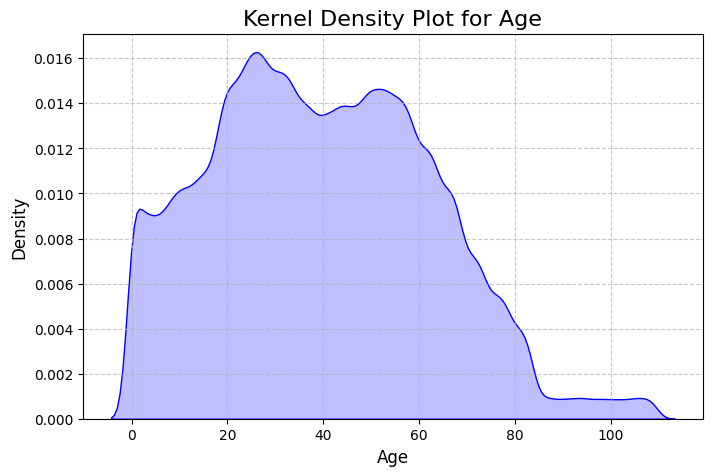

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a kernel density estimate (KDE) for the AGE column
plt.figure(figsize=(8, 5))
sns.kdeplot(df['AGE'], shade=True, color="blue", bw_adjust=1)  # 'shade=True' fills the curve
plt.title("Kernel Density Plot for Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

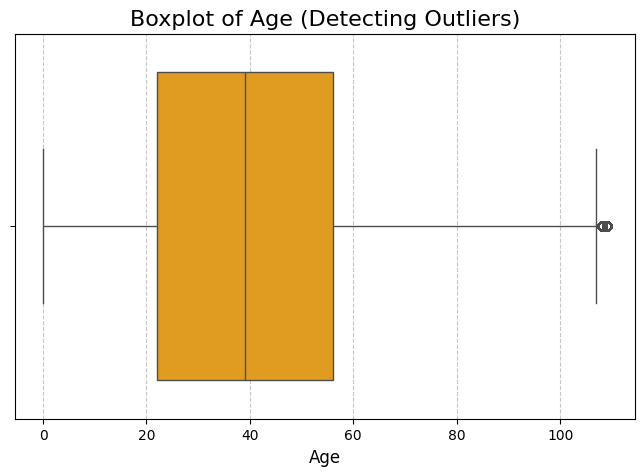

In [32]:
# Plot a boxplot for the AGE column
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['AGE'], color='orange')
plt.title("Boxplot of Age (Detecting Outliers)", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [35]:
Q1 = df['AGE'].quantile(0.25)  # First quartile (25%)
Q3 = df['AGE'].quantile(0.75)  # Third quartile (75%)
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['AGE'] < lower_bound) | (df['AGE'] > upper_bound)]
print("Outliers' indices in AGE column:\n", outliers.index)

Outliers' index in AGE column:
 Index([     42,      74,    1044,    1257,    1861,    2119,    2394,    2935,
          3044,    3153,
       ...
       1023748, 1023817, 1023875, 1024058, 1024387, 1024572, 1024850, 1024905,
       1025369, 1025390],
      dtype='int64', length=1968)


### Explore Categorical variables

In [53]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns in the DataFrame:", categorical_columns)
for col in categorical_columns:
    print('---------------------------------------')
    print(f'unique value count: {df[col].unique().shape[0]}')
    print('---------------------------------------')
    print(f"Value counts for {col}:\n", df[col].value_counts(), "\n")

Categorical columns in the DataFrame: Index(['DIFFERENTIAL_DIAGNOSIS', 'SEX', 'PATHOLOGY', 'EVIDENCES',
       'INITIAL_EVIDENCE'],
      dtype='object')
---------------------------------------
unique value count: 241312
---------------------------------------
Value counts for DIFFERENTIAL_DIAGNOSIS:
 DIFFERENTIAL_DIAGNOSIS
[['Localized edema', 0.6962440370572797], ['Chagas', 0.19239132923750693], ['Anaphylaxis', 0.11136463370521343]]                                                                                                                                                                                                                                                                                                                                                                                                                                                 10167
[['Allergic sinusitis', 1.0]]                                                                                              

<ipython-input-40-1aba03b0479e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SEX', data=df, palette='Set2')


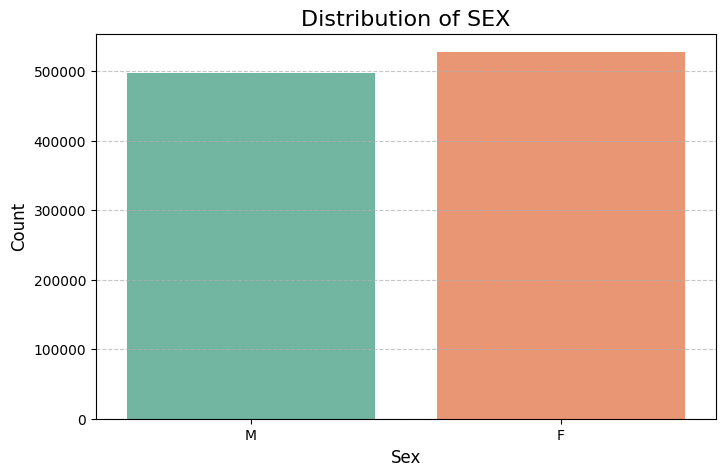

In [40]:
# Bar plot for SEX
plt.figure(figsize=(8, 5))
sns.countplot(x='SEX', data=df, palette='Set2')
plt.title("Distribution of SEX", fontsize=16)
plt.xlabel("Sex", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-42-81533d6f9d4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


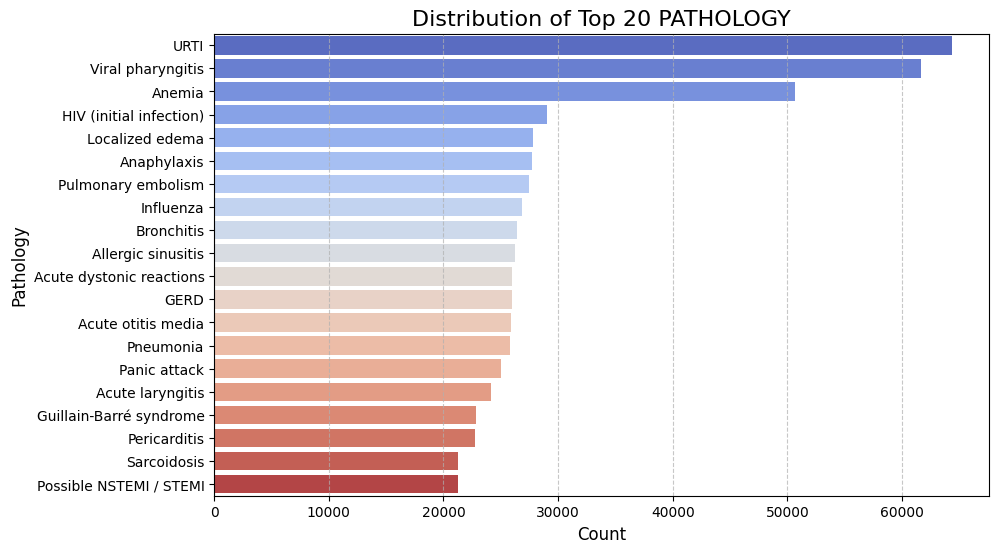

In [42]:
# Bar plot for PATHOLOGY
# Get the top 20 categories in PATHOLOGY
top_20_pathologies = df['PATHOLOGY'].value_counts().nlargest(20)
#print("Top 20 Pathologies:\n", top_20_pathologies)
plt.figure(figsize=(10, 6))
sns.barplot(
    y=top_20_pathologies.index,
    x=top_20_pathologies.values,
    palette='coolwarm'
)
plt.title("Distribution of Top 20 PATHOLOGY", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Pathology", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Explore Relationships Between Variables

In [54]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test on the cross-tabulation
chi2, p, dof, expected = chi2_contingency(cross_tab)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)

Chi-Square Statistic: 713.932139633056
P-value: 1.987771231092623e-119


### Observation:
This suggests that the occurrence of certain pathologies may vary depending on the SEX of the individual.
For example, some pathologies might be more common in males, while others might be more common in females.

In [56]:
cross_tab.T

SEX,F,M
PATHOLOGY,,
Acute COPD exacerbation / infection,7549,10112
Acute dystonic reactions,13339,12643
Acute laryngitis,12423,11706
Acute otitis media,13353,12564
Acute pulmonary edema,9819,9199
Acute rhinosinusitis,7156,6422
Allergic sinusitis,13383,12820
Anaphylaxis,14246,13472
Anemia,26194,24471


SEX                                      F      M
PATHOLOGY                                        
Acute COPD exacerbation / infection   7549  10112
Acute dystonic reactions             13339  12643
Acute laryngitis                     12423  11706
Acute otitis media                   13353  12564
Acute pulmonary edema                 9819   9199
                             PATHOLOGY SEX  Count
0  Acute COPD exacerbation / infection   F   7549
1             Acute dystonic reactions   F  13339
2                     Acute laryngitis   F  12423
3                   Acute otitis media   F  13353
4                Acute pulmonary edema   F   9819


<ipython-input-65-20997df0d295>:15: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  sns.barplot(


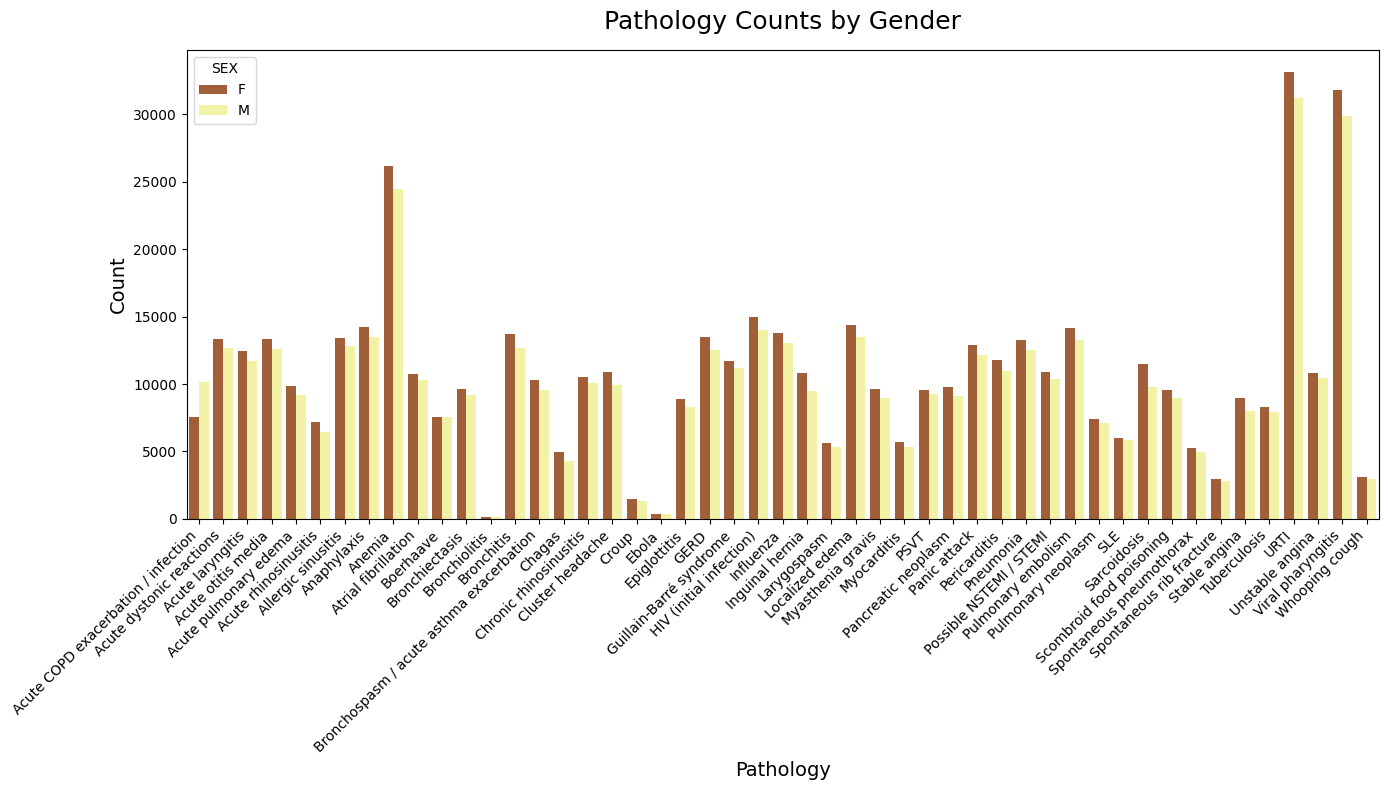

In [65]:
# Cross-tabulation and transpose
cross_tab = pd.crosstab(df['SEX'], df['PATHOLOGY']).T
print(cross_tab.head())  # View the transposed table
# Reshape the cross-tabulation to long format
cross_tab_long = cross_tab.reset_index().melt(
    id_vars='PATHOLOGY',
    var_name='SEX',
    value_name='Count'
)
print(cross_tab_long.head())  # View the reshaped data

# Bar plot
plt.figure(figsize=(14, 8))
reversed_palette = sns.color_palette('Paired')[::-1]
sns.barplot(
    x='PATHOLOGY',
    y='Count',
    hue='SEX',
    data=cross_tab_long,
    palette=reversed_palette
)

# Add titles and labels
plt.title("Pathology Counts by Gender", fontsize=18, pad=15)
plt.xlabel("Pathology", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

##### If Numerical Predictors exist

Examine correlations

In [68]:
# Summarize AGE by PATHOLOGY
age_summary = df.groupby('PATHOLOGY')['AGE'].describe()
age_summary

,count,mean,std,min,25%,50%,75%,max
PATHOLOGY,,,,,,,,
Acute COPD exacerbation / infection,17661.0,55.985335,16.094081,30.0,44.0,55.0,66.0,109.0
Acute dystonic reactions,25982.0,37.926603,23.360998,0.0,19.0,36.0,55.0,109.0
Acute laryngitis,24129.0,38.200630,23.159996,0.0,20.0,37.0,56.0,109.0
Acute otitis media,25917.0,37.759965,23.148340,0.0,19.0,36.0,55.0,109.0
Acute pulmonary edema,19018.0,46.993532,18.965916,18.0,31.0,46.0,60.0,109.0
Acute rhinosinusitis,13578.0,39.943512,22.074458,2.0,22.0,38.0,56.0,109.0
Allergic sinusitis,26203.0,39.354769,24.550531,0.0,20.0,38.0,57.0,109.0
Anaphylaxis,27718.0,37.686125,23.202405,0.0,19.0,36.0,55.0,109.0
Anemia,50665.0,38.021218,23.283368,0.0,20.0,37.0,55.0,109.0


<ipython-input-71-23a5b577d885>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


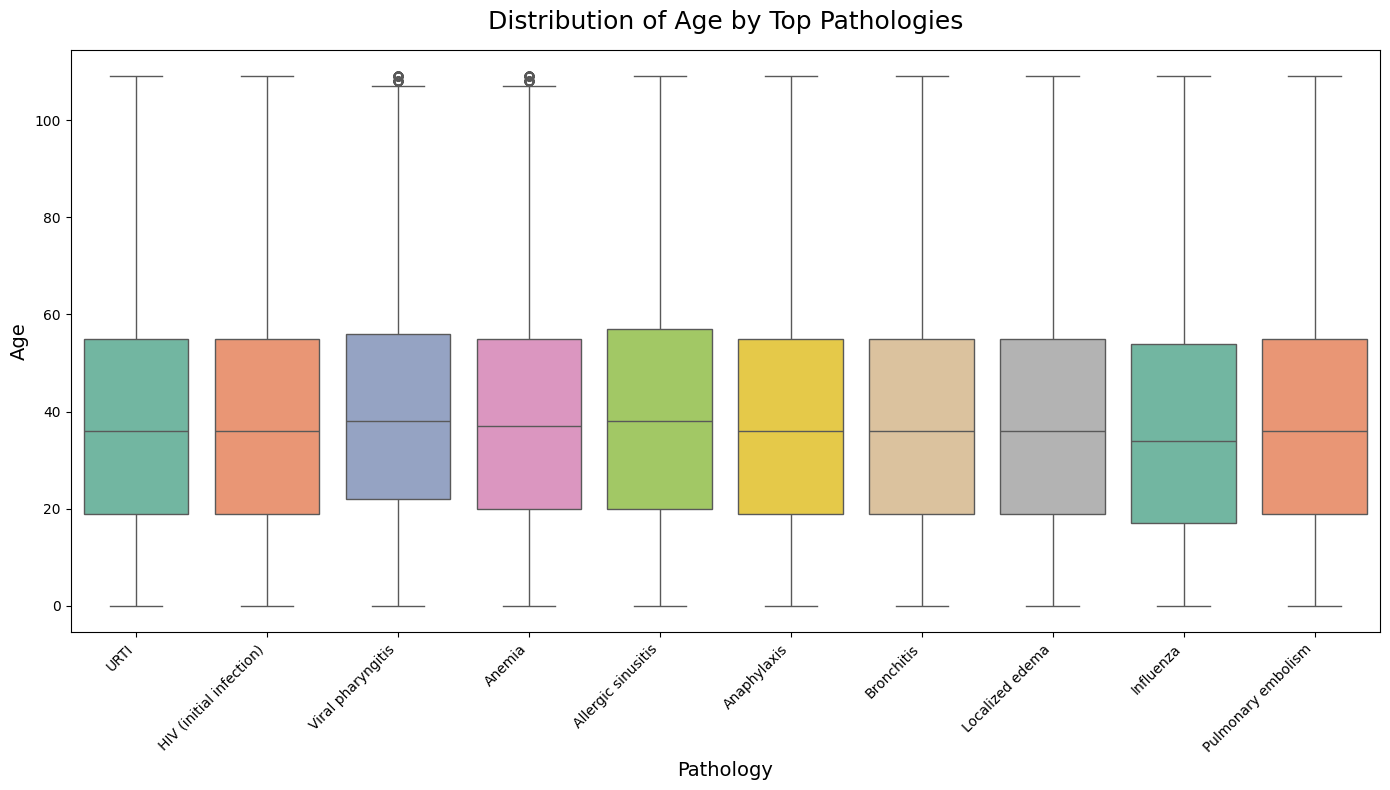

In [71]:
# Top N pathologies by frequency
top_n = 10
top_pathologies = df['PATHOLOGY'].value_counts().head(top_n).index

# Filter the dataset for the top N categories
filtered_df = df[df['PATHOLOGY'].isin(top_pathologies)]

# Box plot for AGE across the top N PATHOLOGY categories
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='PATHOLOGY',
    y='AGE',
    data=filtered_df,
    palette='Set2'
)
plt.title("Distribution of Age by Top Pathologies", fontsize=18, pad=15)
plt.xlabel("Pathology", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [86]:
'''# Violin plot for AGE across the top N PATHOLOGY categories
plt.figure(figsize=(14, 8))
sns.violinplot(
    x='PATHOLOGY',
    y='AGE',
    data=filtered_df,
    palette='Set2'
)
plt.title("Age Distribution by Top Pathologies", fontsize=18, pad=15)
plt.xlabel("Pathology", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()'''

'# Violin plot for AGE across the top N PATHOLOGY categories\nplt.figure(figsize=(14, 8))\nsns.violinplot(\n    x=\'PATHOLOGY\', \n    y=\'AGE\', \n    data=filtered_df, \n    palette=\'Set2\'\n)\nplt.title("Age Distribution by Top Pathologies", fontsize=18, pad=15)\nplt.xlabel("Pathology", fontsize=14)\nplt.ylabel("Age", fontsize=14)\nplt.xticks(rotation=45, ha=\'right\', fontsize=10)\nplt.tight_layout()\nplt.show()'

In [75]:
from scipy.stats import f_oneway

# Create groups of AGE for each PATHOLOGY
age_groups = [group['AGE'].values for name, group in df.groupby('PATHOLOGY')]

# Perform ANOVA
f_stat, p_value = f_oneway(*age_groups)
print("ANOVA F-statistic:", f_stat)
print("ANOVA P-value:", p_value)

ANOVA F-statistic: 944.7665392046267
ANOVA P-value: 0.0


### the mean AGE differs significantly across at least some of the PATHOLOGY categories.

In [76]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD Test
tukey = pairwise_tukeyhsd(endog=df['AGE'], groups=df['PATHOLOGY'], alpha=0.05)
print(tukey)

                                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                                    
                 group1                                   group2                  meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------------------------------------------------
     Acute COPD exacerbation / infection                 Acute dystonic reactions -18.0587    0.0 -18.9223 -17.1952   True
     Acute COPD exacerbation / infection                         Acute laryngitis -17.7847    0.0 -18.6616 -16.9078   True
     Acute COPD exacerbation / infection                       Acute otitis media -18.2254    0.0 -19.0894 -17.3614   True
     Acute COPD exacerbation / infection                    Acute pulmonary edema  -8.9918    0.0  -9.9171  -8.0665   True
     Acute COPD exacerbation / infection                     Acute rhinosinusitis -16.0418    0.0 -17.0525 -15.0312   True
     Acute COPD 

The difference in the mean AGE between the two groups.
- A positive value means group1 has a higher mean AGE than group2.
- A negative value means group2 has a higher mean AGE than group1.

In [79]:
# Inspect the problematic records
print(df["DIFFERENTIAL_DIAGNOSIS"].head())  # Check if this column contains malformed data
print(df["EVIDENCES"].head())  # Check if evidences are improperly formatted

0    [['Bronchitis', 0.19171203430383882], ['Pneumo...
1    [['HIV (initial infection)', 0.518950056440760...
2    [['Bronchitis', 0.11278064619119596], ['Pneumo...
3    [['URTI', 0.23859396799565236], ['Cluster head...
4    [['URTI', 0.23677812769175735], ['Influenza', ...
Name: DIFFERENTIAL_DIAGNOSIS, dtype: object
0    ['E_48', 'E_50', 'E_53', 'E_54_@_V_161', 'E_54...
1    ['E_9', 'E_27', 'E_50', 'E_51', 'E_53', 'E_54_...
2    ['E_53', 'E_54_@_V_179', 'E_54_@_V_192', 'E_55...
3    ['E_48', 'E_53', 'E_54_@_V_183', 'E_55_@_V_89'...
4    ['E_49', 'E_50', 'E_53', 'E_54_@_V_183', 'E_55...
Name: EVIDENCES, dtype: object


In [80]:
print(df["DIFFERENTIAL_DIAGNOSIS"].apply(type).value_counts())
print(df["EVIDENCES"].apply(type).value_counts())

DIFFERENTIAL_DIAGNOSIS
<class 'str'>    1025602
Name: count, dtype: int64
EVIDENCES
<class 'str'>    1025602
Name: count, dtype: int64


In [81]:
import ast

# Convert stringified lists in the DIFFERENTIAL_DIAGNOSIS column to actual lists
df["DIFFERENTIAL_DIAGNOSIS"] = df["DIFFERENTIAL_DIAGNOSIS"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Convert stringified lists in the EVIDENCES column to actual lists
df["EVIDENCES"] = df["EVIDENCES"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [82]:
# Check the data types again
print(df["DIFFERENTIAL_DIAGNOSIS"].apply(type).value_counts())
print(df["EVIDENCES"].apply(type).value_counts())

DIFFERENTIAL_DIAGNOSIS
<class 'list'>    1025602
Name: count, dtype: int64
EVIDENCES
<class 'list'>    1025602
Name: count, dtype: int64


### Consistency Definition 1

`Consistent`:
- If the identified pathology matches the most probable diagnosis (the diagnosis with the highest probability).

`Inconsistent`:

- If the identified pathology does not match the most probable diagnosis.


In [84]:
# Function to process each record
def analyze_record(record):
    age = record["AGE"]
    sex = record["SEX"]
    pathology = record["PATHOLOGY"]
    differential_diagnosis = record["DIFFERENTIAL_DIAGNOSIS"]
    evidences = record["EVIDENCES"]
    initial_evidence = record["INITIAL_EVIDENCE"]

    # Print basic information
    print(f"AGE: {age}, SEX: {sex}")
    print(f"Identified Pathology: {pathology}")
    print(f"Top Differential Diagnoses:")

    # Check if the differential diagnosis is valid and print it
    if isinstance(differential_diagnosis, list) and all(
        isinstance(item, list) and len(item) == 2 for item in differential_diagnosis
    ):
        for diagnosis, probability in differential_diagnosis:
            print(f" - {diagnosis}: {probability:.2%}")
    else:
        print(" - No valid differential diagnosis data available.")
        print(f"Pathology Consistency: Inconsistent")
        return  # Skip further consistency checks

    # Find the most probable diagnosis
    if differential_diagnosis:
        most_probable_diagnosis = max(differential_diagnosis, key=lambda x: x[1])[0]
    else:
        most_probable_diagnosis = None

    # Determine consistency
    consistent = pathology == most_probable_diagnosis
    print(f"Pathology Consistency: {'Consistent' if consistent else 'Inconsistent'}")

    # Analyze evidences
    print("\nEvidences:")
    if isinstance(evidences, list):
        for evidence in evidences:
            print(f" - {evidence}: Unknown description")
    else:
        print(" - No valid evidences available.")

    print(f"Initial Evidence: {initial_evidence}")
    print("-" * 50)

# Randomly sample 10 records and apply the function
sampled_records = df.sample(n=10, random_state=122)
sampled_records.apply(analyze_record, axis=1)

AGE: 10, SEX: M
Identified Pathology: Viral pharyngitis
Top Differential Diagnoses:
 - Viral pharyngitis: 76.31%
 - Acute laryngitis: 23.69%
Pathology Consistency: Consistent

Evidences:
 - E_41: Unknown description
 - E_45: Unknown description
 - E_49: Unknown description
 - E_53: Unknown description
 - E_54_@_V_181: Unknown description
 - E_55_@_V_20: Unknown description
 - E_55_@_V_33: Unknown description
 - E_55_@_V_137: Unknown description
 - E_55_@_V_148: Unknown description
 - E_55_@_V_163: Unknown description
 - E_56_@_4: Unknown description
 - E_57_@_V_123: Unknown description
 - E_58_@_5: Unknown description
 - E_59_@_3: Unknown description
 - E_181: Unknown description
 - E_204_@_V_10: Unknown description
Initial Evidence: E_53
--------------------------------------------------
AGE: 1, SEX: M
Identified Pathology: SLE
Top Differential Diagnoses:
 - SLE: 11.04%
 - Bronchospasm / acute asthma exacerbation: 8.58%
 - Pulmonary embolism: 8.21%
 - Pneumonia: 6.85%
 - Scombroid foo

,0
369399,None
266423,None
672098,None
1009592,None
664160,None
1023521,None
704779,None
651490,None
281978,None
231100,None


### Consistency Definition 2

`Consistent`:
- If the identified pathology matches the most probable diagnosis (the diagnosis with the highest probability).
OR, if the identified pathology matches the second most probable diagnosis, AND the difference between their probabilities is less than 0.01 (1%).

`Inconsistent`:

- If the identified pathology does not match the most probable diagnosis.
AND if it matches the second most probable diagnosis but the difference between their probabilities is 0.01 or greater.

In [85]:
# Function to process each record
def analyze_record(record):
    age = record["AGE"]
    sex = record["SEX"]
    pathology = record["PATHOLOGY"]
    differential_diagnosis = record["DIFFERENTIAL_DIAGNOSIS"]
    evidences = record["EVIDENCES"]
    initial_evidence = record["INITIAL_EVIDENCE"]

    # Print basic information
    print(f"AGE: {age}, SEX: {sex}")
    print(f"Identified Pathology: {pathology}")
    print(f"Top Differential Diagnoses:")

    # Check if the differential diagnosis is valid and print it
    if isinstance(differential_diagnosis, list) and all(
        isinstance(item, list) and len(item) == 2 for item in differential_diagnosis
    ):
        for diagnosis, probability in differential_diagnosis:
            print(f" - {diagnosis}: {probability:.2%}")
    else:
        print(" - No valid differential diagnosis data available.")
        print(f"Pathology Consistency: Inconsistent")
        return  # Skip further consistency checks

    # Sort diagnoses by probability in descending order
    sorted_diagnoses = sorted(differential_diagnosis, key=lambda x: x[1], reverse=True)

    # Identify the top two probabilities
    most_probable_diagnosis, most_probable_prob = sorted_diagnoses[0]
    second_most_probable_diagnosis, second_most_probable_prob = (
        sorted_diagnoses[1] if len(sorted_diagnoses) > 1 else (None, 0)
    )

    # Check consistency
    consistent = False
    if pathology == most_probable_diagnosis:
        consistent = True
    elif pathology == second_most_probable_diagnosis and abs(
        most_probable_prob - second_most_probable_prob
    ) < 0.01:  # Difference is less than 1%
        consistent = True

    print(f"Pathology Consistency: {'Consistent' if consistent else 'Inconsistent'}")

    # Analyze evidences
    print("\nEvidences:")
    if isinstance(evidences, list):
        for evidence in evidences:
            print(f" - {evidence}: Unknown description")
    else:
        print(" - No valid evidences available.")

    print(f"Initial Evidence: {initial_evidence}")
    print("-" * 50)

# Randomly sample 10 records and apply the function
sampled_records = df.sample(n=10, random_state=567)
sampled_records.apply(analyze_record, axis=1)

AGE: 33, SEX: F
Identified Pathology: Acute pulmonary edema
Top Differential Diagnoses:
 - Unstable angina: 16.90%
 - Acute pulmonary edema: 16.85%
 - Stable angina: 15.05%
 - Possible NSTEMI / STEMI: 12.01%
 - Myocarditis: 10.87%
 - Chagas: 9.14%
 - Pericarditis: 7.66%
 - Atrial fibrillation: 6.15%
 - GERD: 5.36%
Pathology Consistency: Consistent

Evidences:
 - E_5: Unknown description
 - E_8: Unknown description
 - E_53: Unknown description
 - E_54_@_V_161: Unknown description
 - E_54_@_V_180: Unknown description
 - E_54_@_V_183: Unknown description
 - E_55_@_V_34: Unknown description
 - E_55_@_V_101: Unknown description
 - E_55_@_V_160: Unknown description
 - E_55_@_V_170: Unknown description
 - E_55_@_V_171: Unknown description
 - E_56_@_6: Unknown description
 - E_57_@_V_30: Unknown description
 - E_57_@_V_31: Unknown description
 - E_57_@_V_118: Unknown description
 - E_57_@_V_127: Unknown description
 - E_57_@_V_194: Unknown description
 - E_58_@_6: Unknown description
 - E_59_@

,0
727210,None
781999,None
442964,None
893591,None
985239,None
59479,None
902258,None
1015205,None
34492,None
77742,None
